## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1.1

<img src = "1.1.jpg">

In [2]:
def UniformMidpointRule(last_M:int,interval:int) -> tuple:
    """
    Get the f_m_bar approximation for every M number of points
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    """
    ## List of number of Quadrature points to generate function approximation on
    M = np.arange(2,last_M+1,interval)
    f_m_unif = []

    ## Generating approximate function for m number of Quadrature points
    for m in M:
        sum = 0
        ## Calculating the f_m for every M value
        for i in range(1,m+1):
            b_i = float(1/m)
            c_i = float((1/(2*m)) + ((i-1)/(m)))
            sum += float(b_i*np.sqrt(1-(c_i)**2))
        ## f_M
        f_m_unif.append(sum)
    f_m_unif = np.array(f_m_unif)

    #f_m3_uni_midpoint = f_m_unif[2] # To compare with the 2nd question

    return M,f_m_unif

def UniformMidpointPlot(last_M:int,interval:int, err_plot: bool)-> None:
    """
    Generate the plot for Uniform Interval midpoint rule quadrature points
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    @param: err_plot: To Generate error plot or not for function approximation produced at m quadrature points
    """

    # Obtaining the Quadrature points and Respective function approximation via use of uniform midpoint rule
    M,f_MC = UniformMidpointRule(last_M,interval)
    error = f_MC-(np.pi/4)

    # Subplots
    fig,axs= plt.subplots(2,1,figsize= (20,12))

    # Sub Plot 1
    # Plotting the line
    axs[0].plot(M,f_MC, label='Line')
    # Plotting the points
    axs[0].scatter(M,f_MC, color='red')
    # Plotting the pi/4 line
    axs[0].axhline(y=(np.pi)/4, color='purple', linestyle='-', linewidth=1, label = 'pi/4')
    # Adding labels and title
    axs[0].set_xlabel("Number of Quadrature Points")
    axs[0].set_ylabel("Integral Approximation for M points")
    axs[0].set_title('Integral approximation with Uniform Interval Midpoint rule')
    # Adding legend
    axs[0].legend()

    if err_plot:
        axs[1].plot(M,error, label = 'approximation_error')
        axs[1].scatter(M,error)
        axs[1].set_xlabel("Number of Quadrature Points M")
        axs[1].set_ylabel("Error for M points")
        axs[1].set_title("Uniform Interval Midpoint Rule Simulation Errors")
        axs[1].legend()
    # Display the plot
    plt.show()

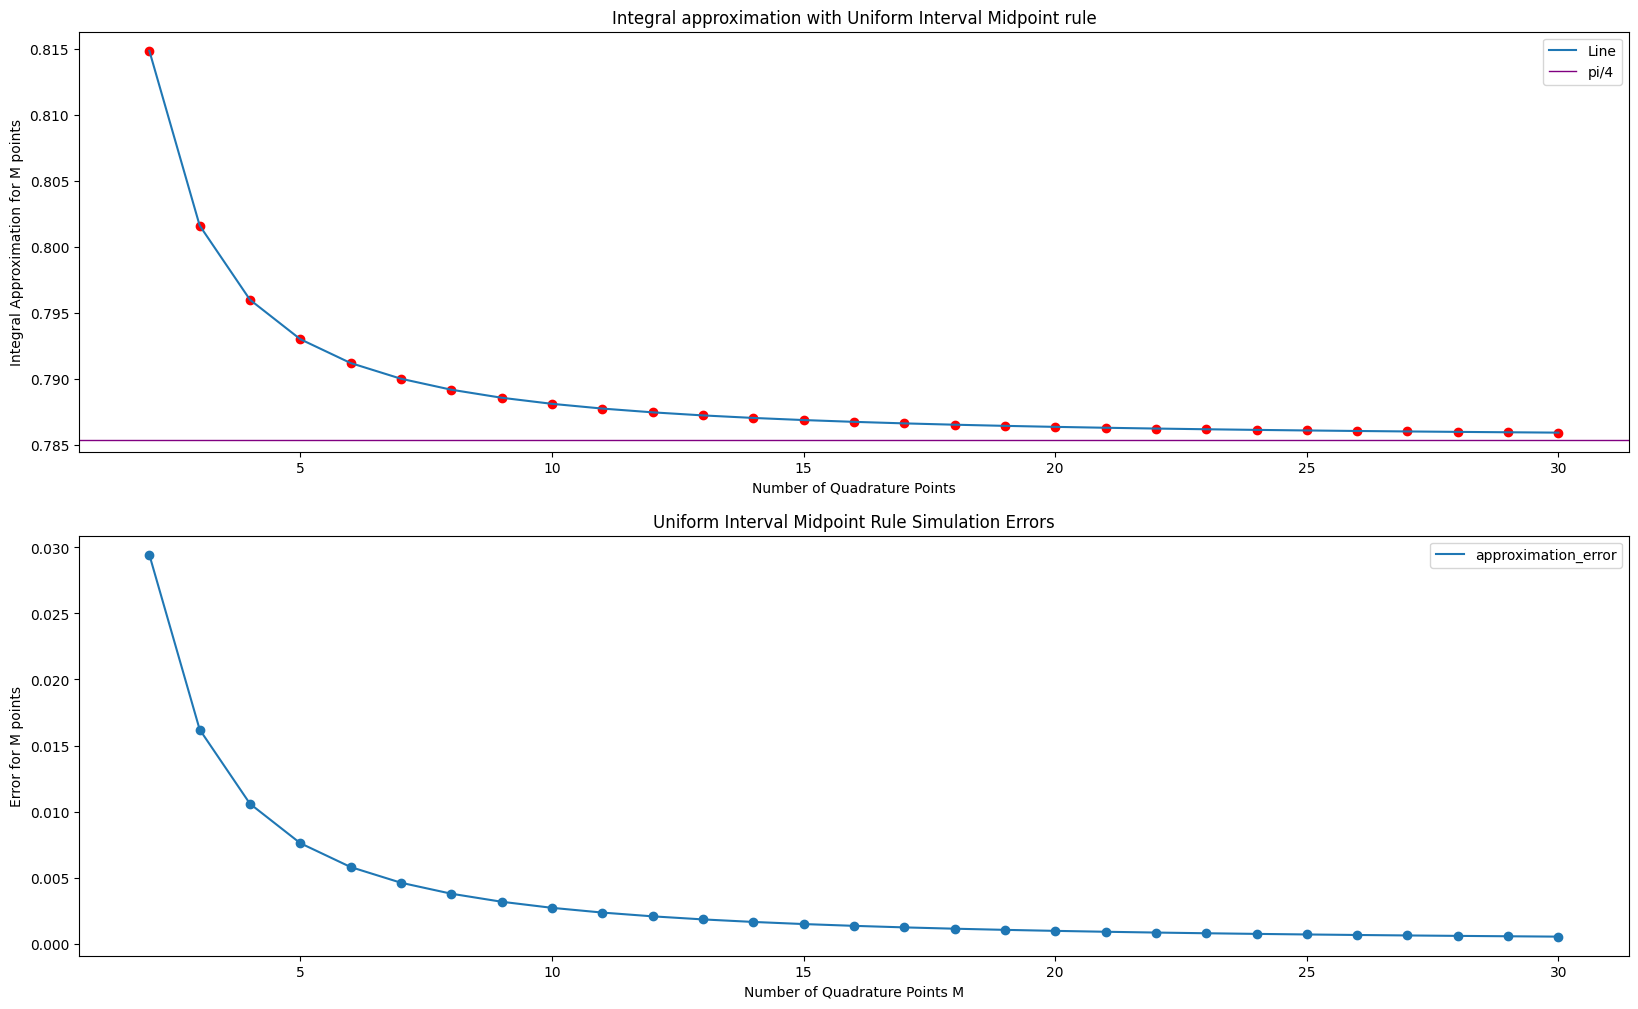

In [3]:
# Simulating the Apprximations
UniformMidpointPlot(last_M = 30,interval = 1,err_plot = 1)

#### Observations for Problem 1.1

- The error goes down as we increase the quadrature points

## Problem 1.2

<img src = "1.2.jpg">

In [4]:
b_i =  np.array([4/9,5/18,5/18])
c_i = np.array([0,np.sqrt(3/5),-1 * np.sqrt(3/5)])

f_m_gauss = []
for m in range(1,4):
    sum = 0
    for j in range(0,m):
        sum += b_i[j]*np.sqrt(1-(c_i[j]**2))
    f_m_gauss.append(sum)

_,f_m_unif = UniformMidpointRule(last_M=30,interval=1)

f_m_gauss = np.array(f_m_gauss)

print("Errors with Midpoint Rule:")
print(f_m_unif[:3] - np.pi/4)
print("Errors with Gauss Rule")
print(f_m_gauss - np.pi/4)

Errors with Midpoint Rule:
[0.02944367 0.016205   0.01058414]
Errors with Gauss Rule
[-0.34095372 -0.16527163  0.01041047]


#### Observations for Problem 1.2

- Observing the gauss approximation, we can see that function approximation almost became same for 3 quadrature points
- Another observation that can be made with Gauss approach the solution converges faster

## Problem 1.3

<img src = '1.3.jpg'>

In [43]:
def AreaApprox(M: int)-> float:
    '''
    Generate Circle area approximation for M quadrature points
    @param: M: Count of Quadrature points
    '''
    ## Drawing a pair of random numbers
    x = np.random.uniform(size = M)
    y = np.random.uniform(size = M)

    hits = 0
    ## Seeing how many points lie in the circle
    for iterate in range(M):

        if (x[iterate]**2 + y[iterate]**2 <=1):
            hits += 1

    ## Returning the area approximation for M points
    return hits/M

def MonteCarloRule(last_M:int,interval:int)-> tuple:
    """
    Get the f_m_bar approximation for given M points via MonteCarlo Rule
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    """
    ## List of number of Quadrature points to generate function approximation on
    M = list(range(10,last_M+1,interval))

    ## Getting area approximations for different values of M
    f_MC = np.array([AreaApprox(m) for m in M])
    
    return M,f_MC

def MonteCarloPlot(last_m: int,interval: int,err_plot: bool)-> None:
    """
    Get the f_m_bar approximation and error plot for given M points via MonteCarlo Rule
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    @param: err_plot: Whether to generate error plot or not
    """
    # Obtaining the Quadrature points and Respective function approximation via use of uniform midpoint rule
    M,f_MC = MonteCarloRule(last_m,interval)

    ## Generating Subplots for Approximation and Errors
    fig,axs = plt.subplots(2,1,figsize= (20,12))
    ## Generating the plot
    axs[0].plot(M,f_MC, label = 'f_MC')
    axs[0].scatter(M,f_MC)
    
    # Plot lines at pi/4
    axs[0].axhline(y=(np.pi)/4, color='purple', linestyle='-', linewidth=1, label = 'pi/4')

    ## Adding visual information
    axs[0].set_xlabel("Number of Quadrature Points M")
    axs[0].set_ylabel("Integral Approximation for M points")
    axs[0].set_title("Monte Carlo Method Simulation")
    axs[0].legend()
    
    if err_plot:
        err = f_MC - np.pi/4
        axs[1].plot(M,err, label = 'approximation_error')
        axs[1].scatter(M,err)
        axs[1].set_xlabel("Number of Quadrature Points M")
        axs[1].set_ylabel("Error for M points")
        axs[1].set_title("Monte Carlo Method Simulation Errors")
        axs[1].legend()


    plt.show()

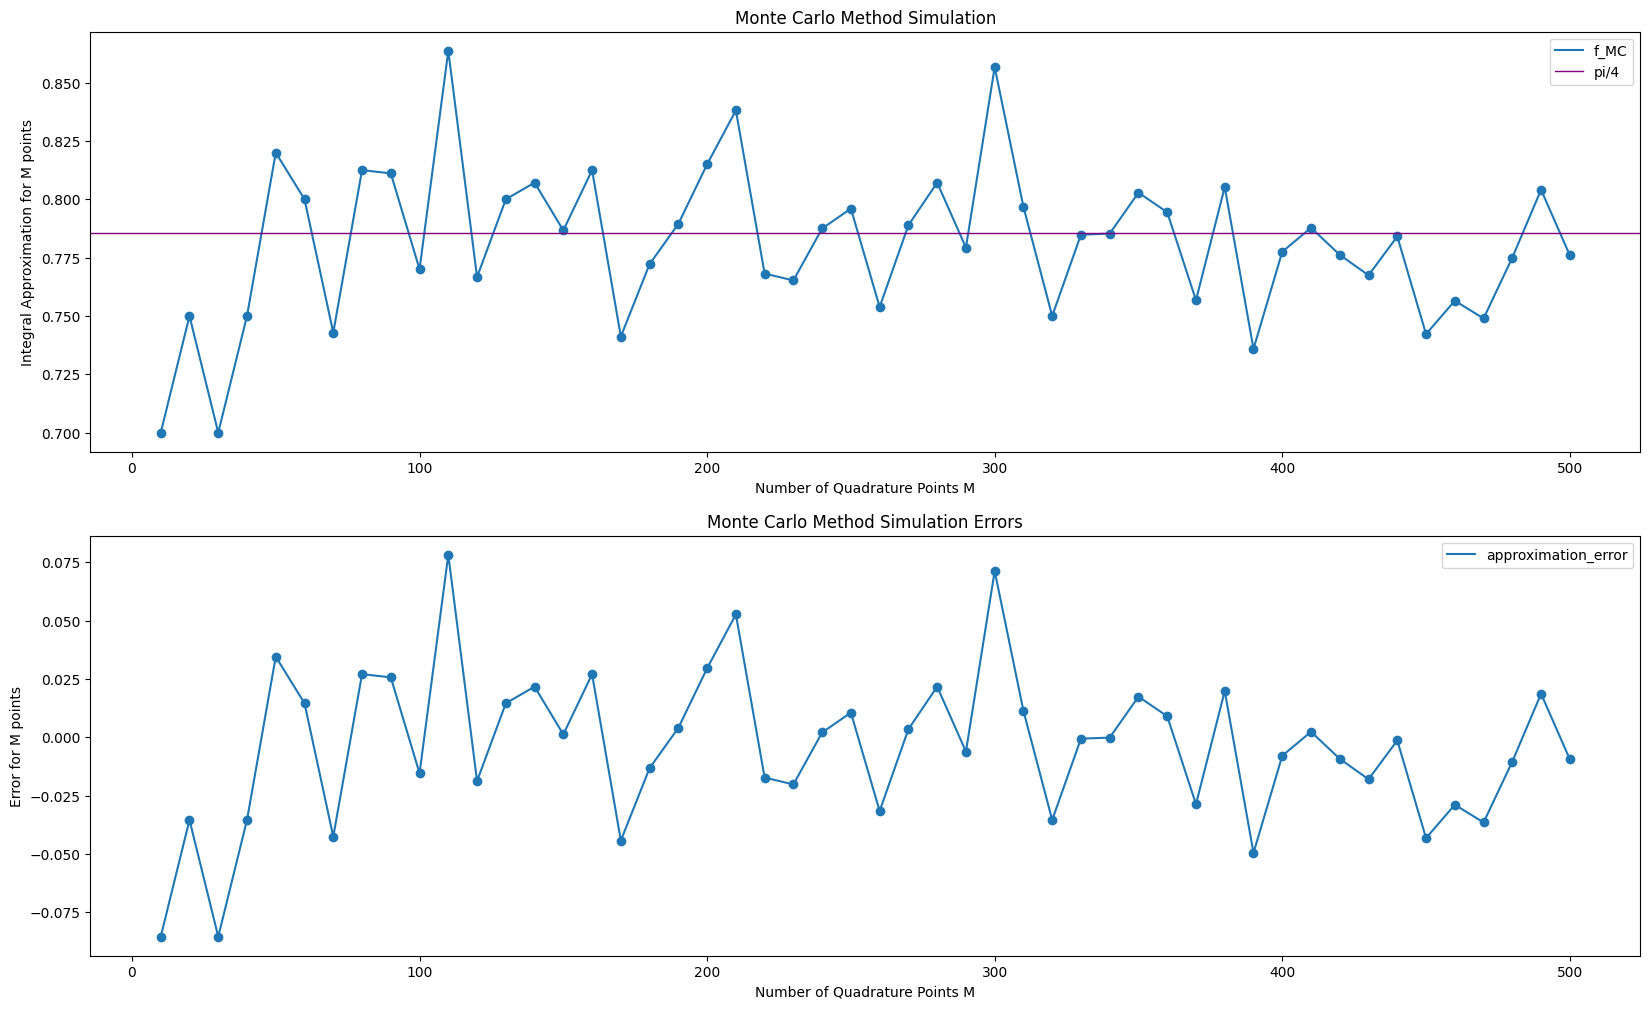

In [44]:
# Simulating the Approximations
interval = 10
f_MC_2 = MonteCarloPlot(last_m = 500,interval = interval,err_plot = 1)

#### Observations for Problem 1.3

- The error goes down as we increase the quadrature points

## Problem 1.4

<img src = '1.4.jpg'>

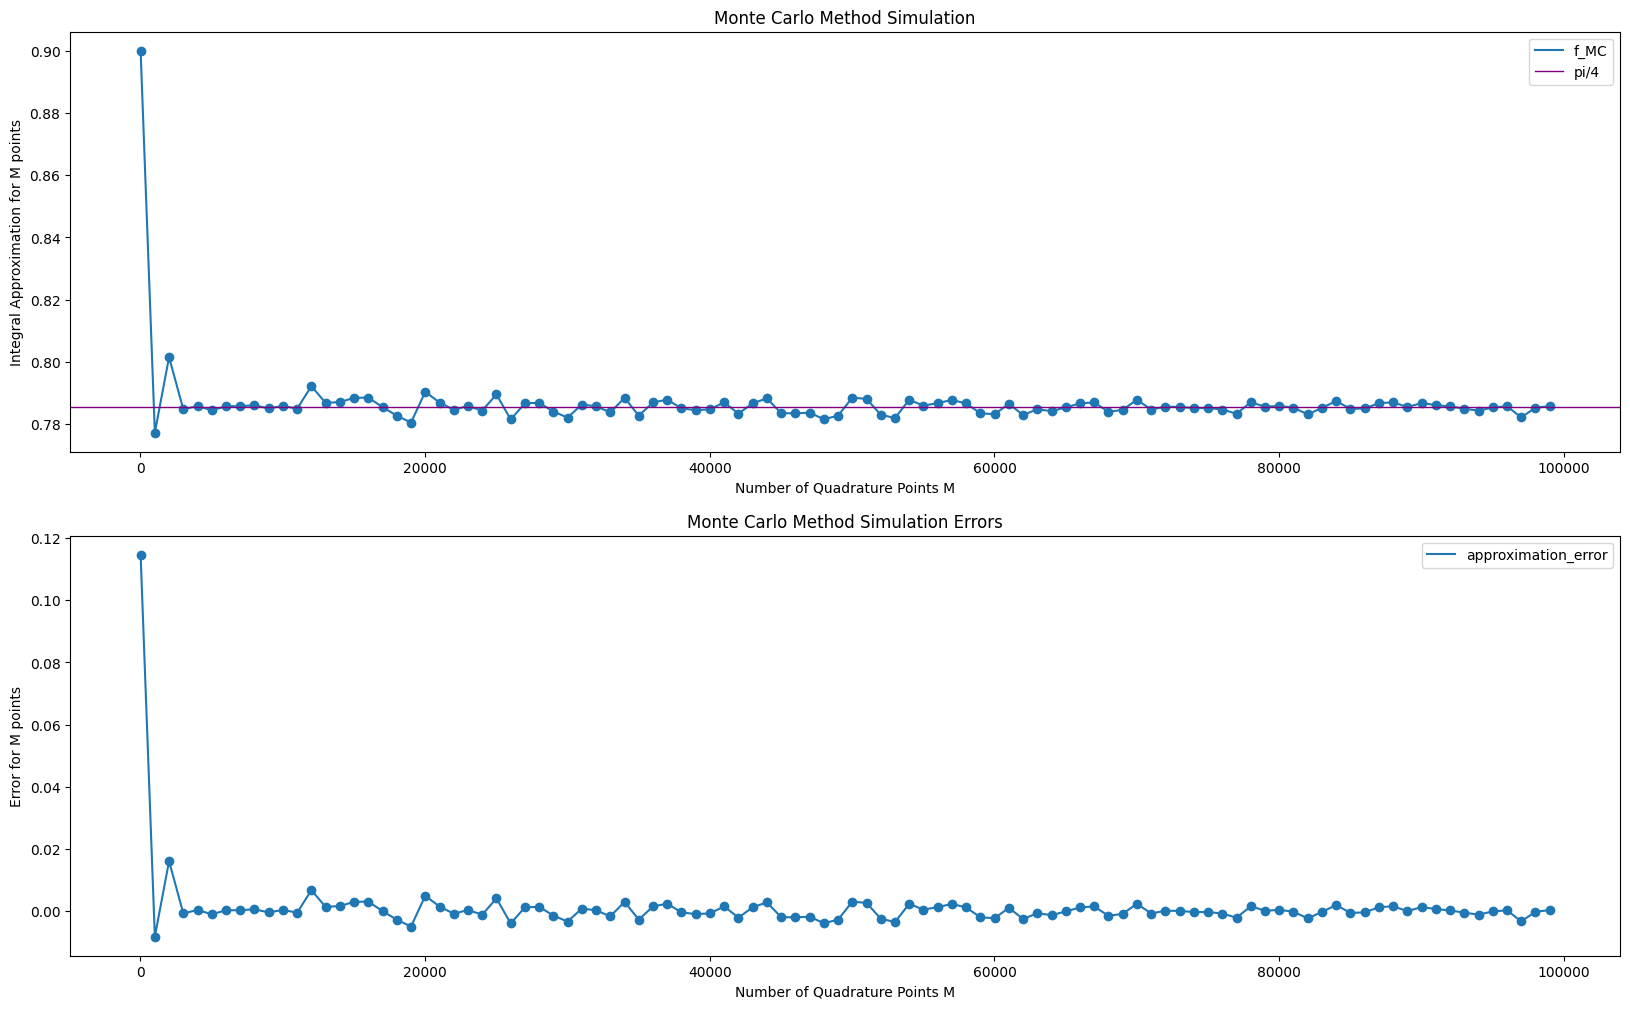

In [45]:
interval = 1000
MonteCarloPlot(last_m = int(1e5),interval = interval,err_plot = 1)

In [46]:
interval = 100
M_c, f_MC = MonteCarloRule(last_M = int(1e5),interval = interval)
M_u, f_uniform = UniformMidpointRule(last_M = int(1e5),interval = interval)

In [9]:
mc_abs_error = f_MC[-1] - np.pi/4
for i,approximation in enumerate(f_uniform):
    err = approximation-np.pi/4
    if err<np.abs(mc_abs_error):
        print(f"Midpoint method attains convergence with mc_abs_error for 1e5 points after {M_u[i]} quadrature point")
        break

Midpoint method attains convergence with mc_abs_error for 1e5 points after 102 quadrature point


#### Observations for Problem 1.4

- Convergence for midpoint rule is achieved faster as compared to monte carlo, we can get same error as of MC method with approx 100 quadrature points.

<img src = '2.jpg'>

### Notes for this exercise

- Function approximation methods: Function approximation methods aim to approximate a given function using a specific class of functions or a mathematical model. These methods involve selecting a suitable set of basis functions or a functional form that can closely represent the target function. Common function approximation methods include polynomial interpolation, spline interpolation, regression analysis, neural networks, and other machine learning techniques. The choice of the function approximation method depends on the nature of the problem, available data, and desired accuracy.
    - Monte Carlo methods: Monte Carlo methods involve using random sampling techniques to approximate the value or behavior of a function. It is a statistical approach that relies on generating random samples and using them to estimate properties of the function, such as its integral or expected value. Monte Carlo methods are versatile and can handle a wide range of problems, including high-dimensional and complex functions. They are often used when analytical solutions are not available or when other approximation methods are not suitable.
    - Midpoint rule: The midpoint rule is a numerical integration method used to approximate the definite integral of a function. It divides the integration interval into subintervals and evaluates the function at the midpoint of each subinterval. The integral is then approximated as the sum of the products of the function values at the midpoints and the width of the subintervals. The midpoint rule is a simple and straightforward approximation method but may not be as accurate as more sophisticated integration techniques like Simpson's rule or Gaussian quadrature.

- Gaussian function approximation using quadrature points and Monte Carlo function approximation are different approaches for function approximation. Gaussian function approximation is suitable for smooth functions with well-defined features, while Monte Carlo function approximation is versatile and applicable to a wide range of functions, particularly those that are complex or have stochastic components. The choice between the two methods depends on the nature of the function, the desired accuracy, the available data, and the specific requirements of the problem at hand.